# Прогнозирование вероятности оттока пользователей для фитнес-центров

__Цель исследования:__ анализ оттока клиентов с подготовкой плана действий по удержанию клиентов на основе аналитических данных для разработки стратегии взаимодействия с клиентами в сети фитнес-центров «Культурист-датасаентист».<br>
__Задачи исследования:__ <br>
1) научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;<br>
2) сформировать типичные портреты клиентов, аименно выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;<br>
3) провести анализ основных признаков, наиболее сильно влияющие на отток;<br>
4) сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами;<br>
- выделить целевые группы клиентов;
- предложить меры по снижению оттока;
- определить другие особенности взаимодействия с клиентами.
<br>
<br>
Анализ будет проводиться на основе данных, которые подготовил заказчик, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.


__Выполненные задачи в рамках проекта:__ <br>
- подготовлены данные для анализа;
- проведен анализ средних значений и стандартных отклонений по клиентам фитнес-центра;
- построены столбчатые гистограммы и распределения признаков целевым группам;
- построение матрицы корреляции и тепловой карты для распределения признаков по влиянию факторов на отток;
- построена модель прогнозирования оттока клиентов с помощью двух моделей - линейной регрессии и случайным лесом;
- проведена кластеризация клиентов с выделением по каждому кластеру признаков;
- сформированы рекомендации по снижению оттока из фитнес-центра.

### Содержание
<ul style="list-style:none; text-decoration: none">
    <li><a style="text-decoration: none" href="#introduction">1. Загрузка данных и подготовка их к анализу</a></li>
    <li><a style="text-decoration: none" href="#data_pre-processing">2. Проведение исследовательского анализа данных (EDA)</a></li>
    <li><a style="text-decoration: none" href="#analysis">3. Построение модели прогнозирования оттока клиентов</a></li>
    <li><a style="text-decoration: none" href="#research_analysis">4. Кластеризация клиентов</a></li>
    <li><a style="text-decoration: none" href="#conclusion">5. Формулировка выводов с выработкой базовых рекомендаций по работе с клиентами</a></li>
</ul>

## 1. Загрузка данных и подготовьте их к анализу <a name="introduction"></a> 

In [1]:
#Импортирую библиотеку
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import scipy.stats as stats
from plotly import graph_objects as go
import math as mth
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

Импортирую библиотеку Pandas и с помощью метода .read_csv() создаю новый DataFrame __gym_churn__ 

In [2]:
gym_churn = pd.read_csv('gym_churn.csv')

Создаю функцию для получения основной информации о датафрейме

In [3]:
#пропишем функцию для получения основной информации о датафрейме
def data_describe(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()
    
#запускаем функцию
data_describe(gym_churn) 

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Получаем следующую структуру таблицы __``gym_churn``__:
 
* Количество столбцов: __14__
* Количество строк: __4000__
* Тип данных в столбцах: __float64(4), int64(10)__

Подробно разберём, какие в __``gym_churn``__ столбцы и какую информацию они содержат:
* __gender__ — пол;
* __Near_Location__ — проживание или работа в районе, где находится фитнес-центр;
* __Partner__ — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* __Promo_friends__ — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* __Phone__ — наличие контактного телефона;
* __Age__ — возраст;
* __Lifetime__ — время с момента первого обращения в фитнес-центр (в месяцах).
* __Contract_period__ — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* __Month_to_end_contract__ — срок до окончания текущего действующего абонемента (в месяцах);
* __Group_visits__ — факт посещения групповых занятий;
* __Avg_class_frequency_total__ — средняя частота посещений в неделю за все время с начала действия абонемента;
* __Avg_class_frequency_current_month__ — средняя частота посещений в неделю за предыдущий месяц;
* __Avg_additional_charges_total__ — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон;
* __Churn__ — факт оттока в текущем месяце;

Переименуем столбцы для приведения в единый стиль

In [4]:
gym_churn.columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']

Посмотрем нет ли в таблице пропущенных значений

In [5]:
print('\nНайдено пропущенных значений: {}\n'.format(gym_churn.duplicated().sum()))


Найдено пропущенных значений: 0



Проверим на наличие нулевых значений

In [6]:
print('\nНайдено нулевых значений: {}\n'.format(gym_churn.isnull().sum().sum()))


Найдено нулевых значений: 0



__Вывод:__<br>
Полученная таблица содержит в себе информацию о посетителях фитнес-центра с количественной информацией о них, а также информацию об оттоках. Количество столбцов в таблице 14, а количество строк 4000. В таблице отсутствуют пропущенные значения и дубликаты. Перейдем теперь к анализу таблицы.

## 2.  Проведение исследовательского анализа данных (EDA) <a name="data_pre-processing"></a> 

Прежде чем отправить данные на вход модели и получить прогнозы, проводем «разведку данных» — EDA (англ. explоratory data analysis), или исследовательский анализ данных. На этом этапе вы мы изучим распределение отдельных признаков и целевой переменной, постороим корреляцию между величинами, исследуем специфику датасета. 

### Анализ средних значений и стандартных отклонений

Выведем снова методом __describe__ основные характеристики __gym_churn__.

In [7]:
gym_churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


1) Отсутсвующие признаки отсутствуют<br>
2) Средние значения находятся в норме, отклоняющих значений не выявлено. Ближе к единице находятся следующие значения near_Location, phone. То есть большинство клиентов  проживают или работают в районе, где находится фитнес-центр, а также у большей части указан номер телефона. Длительность договора в среднем превышает три  месяца и в среднем человек ходит около двух раз в неделю в спортзал. Средний возраст пользователя 29 лет.<br>
3) Стандартные отклонения тоже в норме, наибольшее стандартное отклонение встречается в столбце "avg_additional_charges_total" - 96,3, по "contract_period" - 4,6 и по 'month_to_end_contract' - 4,1<br>
4) Переменные Age и Avg_additional_charges_total обладают разными по величине стандартными отклонениями. Это говорит о том, что переменные нужно стандартизировать перед обучением, что будет сделано в дальнейшем.

### Анализ средних значений по двум группам

Воспользуемся методом groupby() для нахождения средних значений по двум группам.

In [8]:
mean_gym = gym_churn.groupby('churn').mean()
mean_gym.transpose()

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Исходя из полученных данных можно сделать следующие выводы:
- пол и наличие телефона никак не влиют на отток;
- меньше оттока наблюдается по людям, которые ближе работают или живут от местарасположения клуба, пришедшие в рамках акции «приведи друга» или которые являются сотрудником компании-партнёра клуба;
- люди, которые больше посещают групповые занятие, реже меняют клуб;
- средний возраст по оттоку - 26 лет, в то время как средний возраст по людям, которые остались в клубе - 29 лет;
- люди, которые занимаются в клубе и которые остались, тратят больше денег на другие услуги фитнес-центра, а также более часто посещают занятия в неделю;
- в среднем отток случается по людям, которым осталось до окончания договора 1,5 месяца. 

### Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

Для построния столбчатых гистограмм построим функцию, которая будет строить табличные данные в разрезе признаков по людям, по которым случился отток и по людям, которые остались. После этого функция будет преобразовывать таблицу в график с  помощью метода __plot__.

In [9]:
#создаем функцию
def do_hist(data, i):
    df_one = data[data['churn'] == 1]#делаем срез по группе 1
    df_zero = data[data['churn'] == 0]#делаем срез по группе 0
    churn_table = df_one.pivot_table(index=i, values='churn', aggfunc='count').reset_index()#создаем сводную таблицу по группе 1
    no_churn_table = df_zero.pivot_table(index=i, values='churn', aggfunc='count').reset_index()#создаем сводную таблицу по группе 0
    total_table = churn_table.merge(no_churn_table, on=i)#объединяем таблицы
    total_table = total_table.rename(columns = {'churn_x': 'churn', 'churn_y': 'no_churn'})#переименовываем столбцы
    total_table = total_table.set_index(i)#индекс присваиваем входным данным
    print(total_table)
    total_table.plot(kind='bar').set(
        title='Количество посетителей, которые ушли и которые остались по признаку ' + i,
        ylabel='Количество посетителей'
    );#строим функцию
    plt.show()

Строим графики по каждому признаку, предварительно, уберем один признак, по которому тяжело будет построить нормальный график __avg_additional_charges_total__. Переведем __month_to_end_contract__, __avg_class_frequency_total__ и __avg_class_frequency_current_month__ из типа __float__ в тип __int__, для того чтобы построить графики с данными признаками.

        churn  no_churn
gender                 
0         519      1440
1         542      1499


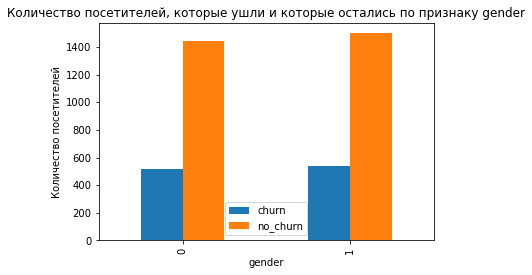

               churn  no_churn
near_location                 
0                246       373
1                815      2566


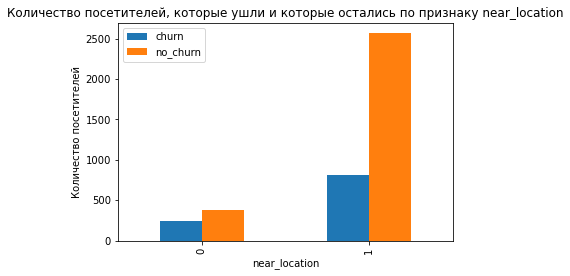

         churn  no_churn
partner                 
0          684      1369
1          377      1570


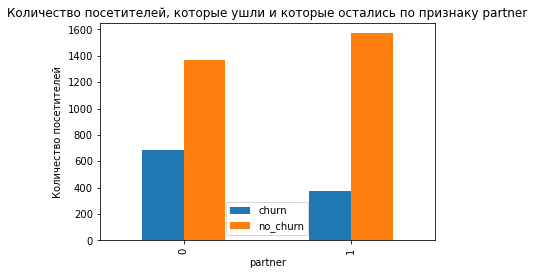

               churn  no_churn
promo_friends                 
0                866      1900
1                195      1039


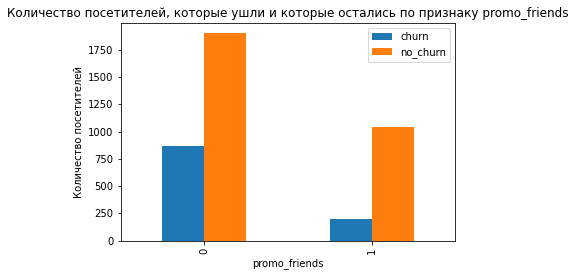

       churn  no_churn
phone                 
0        103       283
1        958      2656


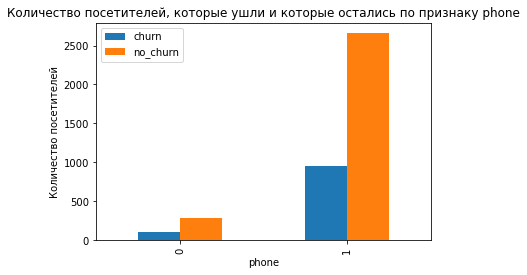

                 churn  no_churn
contract_period                 
1                  934      1273
6                  104       729
12                  23       937


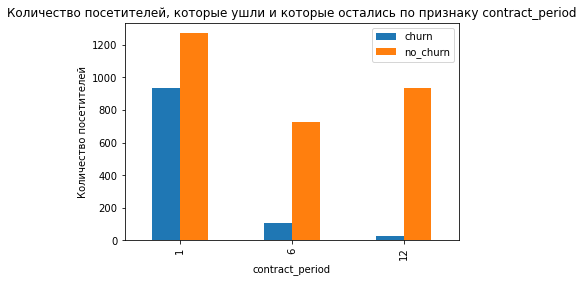

              churn  no_churn
group_visits                 
0               776      1575
1               285      1364


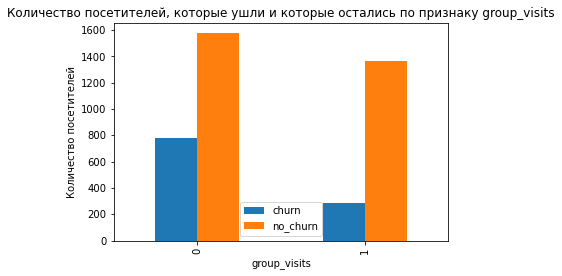

     churn  no_churn
age                 
19       1         1
20      11         3
21      19         5
22      26         7
23      56        26
24      87        61
25     130       101
26     133       167
27     139       239
28     136       311
29     119       349
30      81       376
31      56       378
32      36       328
33      17       236
34       8       166
35       3        95
38       1         9


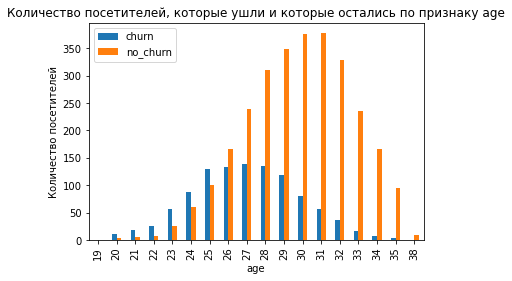

                       churn  no_churn
month_to_end_contract                 
1                        934      1273
2                          2        12
3                          1        22
4                          7        51
5                         19       111
6                         76       569
7                          1        24
8                          1        37
9                          1        72
10                         2        80
11                         4       177
12                        13       511


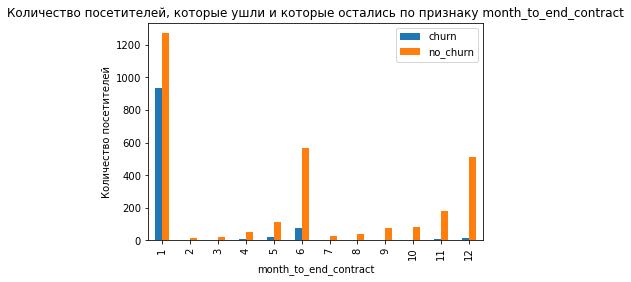

          churn  no_churn
lifetime                 
0           403        84
1           414       429
2           157       453
3            50       440
4            23       360
5             8       265
6             4       216
8             1       110
9             1        99


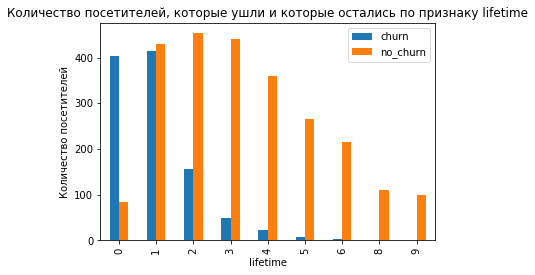

                           churn  no_churn
avg_class_frequency_total                 
0                            258       489
1                            554       944
2                            234       991
3                             15       443


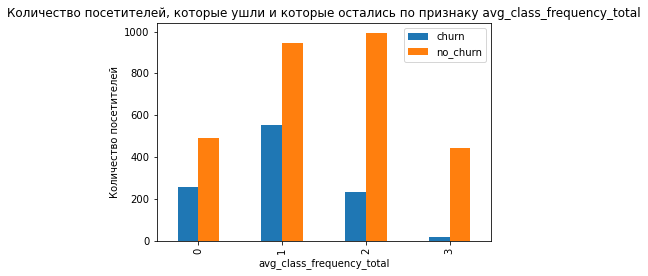

                                   churn  no_churn
avg_class_frequency_current_month                 
0                                    258       489
1                                    554       944
2                                    234       991
3                                     15       443


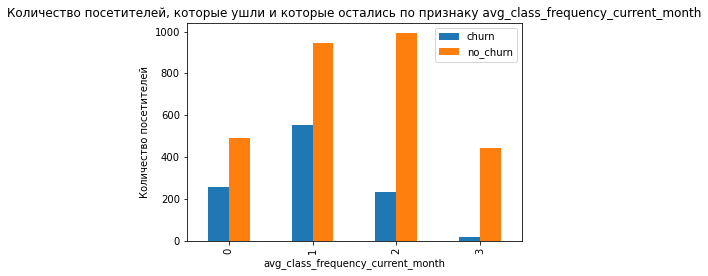

In [10]:
gym_churn_hist = gym_churn.drop(['avg_additional_charges_total'], axis=1)
gym_churn_hist['month_to_end_contract'] = gym_churn_hist['month_to_end_contract'].astype(int)
gym_churn_hist['avg_class_frequency_total'] = gym_churn_hist['avg_class_frequency_total'].astype(int)
gym_churn_hist['avg_class_frequency_current_month'] = gym_churn_hist['avg_class_frequency_total'].astype(int)

for i in gym_churn_hist.drop(['churn'], axis=1).columns:
    do_hist(gym_churn_hist, i)

Исходя из полученных данных можно сделать следующие выводы:
- значение пола никак не влияет на отток посетителей, примерно данные равномерны распределились в разбивке по полу;
- люди предпочитают фитнес центр, который находится рядом с работой или местом их проживания, но при этом можно отметить, что отток по людям, которые живут рядом или работают, достаточно велик; 
- больше оттока наблюдается по людям, которые не являются сотрудниками компании-партнёра клуба;
- больше оттока наблюдается по людям, которые не пользовались акцией «приведи друга»;
- наличие телефона никак не влияет на отток пользователей;
- огромный отток наблюдается по людям, по которым длительность текущего действующего абонемента составляет месяц, практически весь отток приходится на данный срок абонемента;
- больше оттока наблюдается по людям, которые не посещают групповые занятия;
- до 26 лет наблюдается тенденция преобладание оттока над людьми, которые остаются в клубе, после 27 лет отток начинает снижаться, с увеличение количества людей, которые остаются (здесь пик приходится на 32 года);
- основной отток приходится на людей, у которых окончания договора не больше одного месяца;
- по людям, которые более часто ходят в спортзал на неделе, наблюдается меньший отток. Есди человек ходит три раза в неделю спортзал, то вероятность того, что он уйдет, является минимальной.

## Матрица корреляции

Построим с помощью метода __corr__ матрицу корреляции, а затем построим тепловую карту, применив для этого метод __heatmap__.

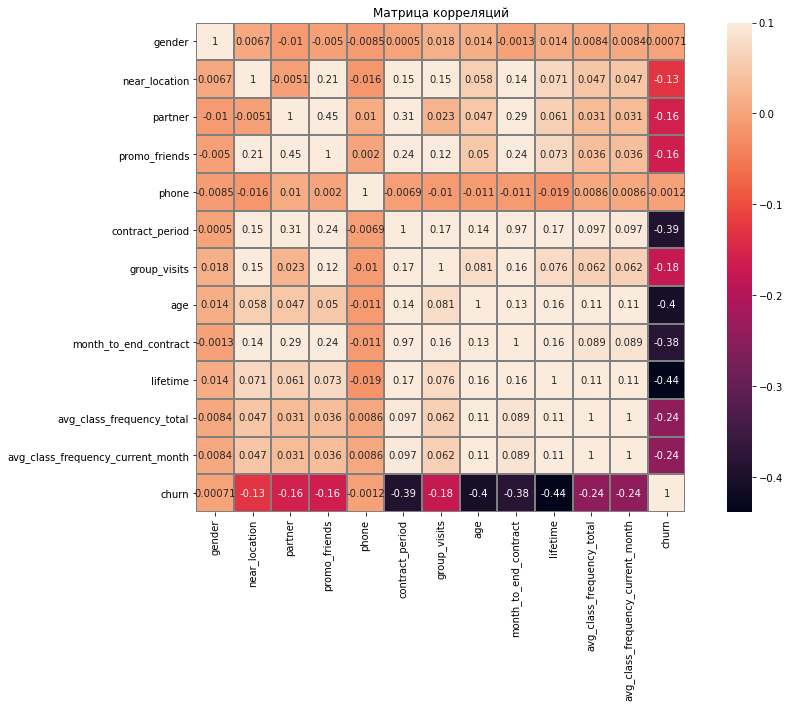

In [11]:
cm = gym_churn_hist.corr()
plt.figure(figsize=(15,9))
sns.heatmap(cm, annot = True, square=True, linewidths=1, linecolor='gray', vmax=0.1).set(title='Матрица корреляций');

На основе полученных значений можно констатировать, что у значения __Churn__ по всем показателям отрицательная корреляция,но в наибольшей степени на отток влияют четыре фактора:<br>
- lifetime (-0,44);
- age (-0,4);
- сontract_period (-0,39);
- month_to_end_contract (-0,38).

__Выводы:__<br>
Анализ значений показал следующие тенденции:
- отток наблюдается в основном по людям от 18 по 26 лет, то есть необходимо понять причины почему так происходит;
- люди, которые живут рядом или работают  с фитнес центром, как правило не склоны менять место, куда он ходит заниматься фитнесом;
- чем чаще человек ходит на тренировки или посещает групповые занятия, тем вероятность оттока по такому человеку ниже;
- основной отток приходится на людей, у которых окончания договора не больше одного месяца.

### 3. Построение модели прогнозирования оттока клиентов <a name="analysis"></a> 

Сделаем следующий алгоритм по построению модели прогнозирования оттока клиентов:<br>
1) разделим наши данные на признаки (матрица X) и целевую переменную (y);<br>
2) разделим модель на обучающую и валидационную выборку;<br>
3) создадим объект класса StandardScaler и применим его к обучающей выборке;<br>
4) применим стандартизацию к матрице признаков для тестовой выборки;<br>
5) после того, как мы зададим список моделей, построим функцию, которая принимает на вход модель и данные и выводит метрики;<br>
6) напишем цикл, который выводит метрики по списку моделей.<br>

In [12]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

# задайте список моделей
models = [
   LogisticRegression(random_state=0, solver='liblinear'),
   RandomForestClassifier(n_estimators=100, random_state=0),
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(model, X_train_st, y_train, X_test_st, y_test, title):
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    print(title, model)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_test, y_pred)))
    print('____________________________________________________')
    print('')


# напишим цикл, который выводит метрики по списку моделей
for i in models:
    make_prediction(i, X_train_st, y_train, X_test_st, y_test, "Метрики для модели")

Метрики для модели LogisticRegression(random_state=0, solver='liblinear')
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
____________________________________________________

Метрики для модели RandomForestClassifier(random_state=0)
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
____________________________________________________



__Выводы:__<br>
Доля правильных ответов (accuracy) при двух выбранных нами моделях составляет более 90%, в первом случае 94%, а во втором 92%, то есть две модели очень близко к 100%. Но необходимо понимать что данная метрика работает не всегда, а только при условии баланса классов. Доля правильных ответов только среди целевого класса (precision) составляет в первой модели 0,90, а во второй 0,88, то есть точность моделей находится на высоком уровне. Показатель "полнота" (recall) составляет в первой модели 0,85, а во второй 0,83. Сводная метрика, которая учитывала баланс между метриками, составляет показатель по первой модели 0,87, а по второй модели 0,85, что в целом является относительно хорошим результатом.

## 4. Кластеризация клиентов <a name="research_analysis"></a> 

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.

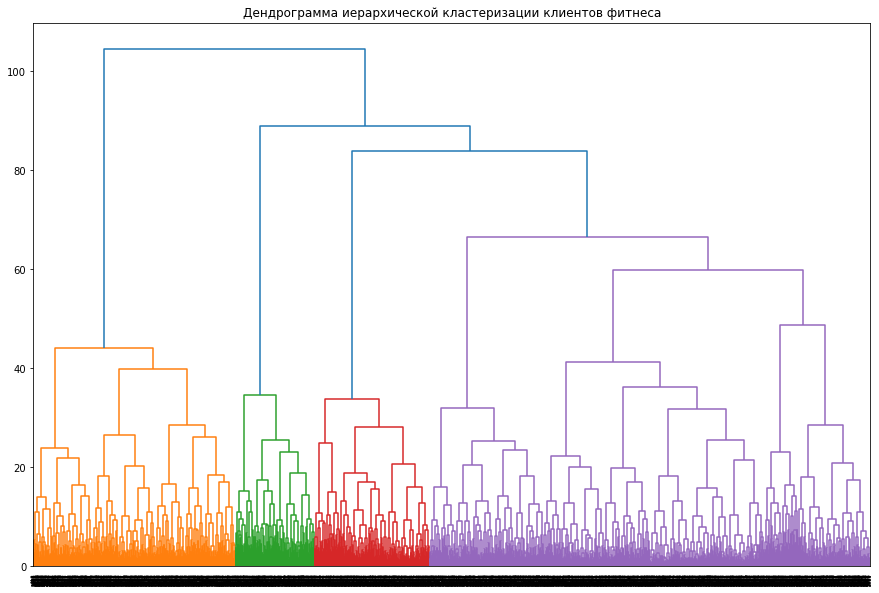

In [13]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма иерархической кластеризации клиентов фитнеса')
plt.show() 

Исходя из построенной нами дендрограммы на основании созданной матрицы расстояний функцией linkage(), выделяют четыре кластера, которые отрисованы разными цветами. 

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5. 

In [14]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)
# сохраняем метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels
# Выводим таблицу с новым столбцом
display(gym_churn.head())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,4
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,4
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


Посмотрим на средние значения признаков для кластеров

In [15]:
# выводим статистику по средним значениям наших признаков по кластеру
df_mean_avg = gym_churn.groupby('cluster_km').mean()
df_mean_avg = df_mean_avg.transpose()
# переименовываем столбцы
df_mean_avg.columns = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']
df_mean_avg

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
gender,0.522078,0.480787,0.559567,0.509603,0.495726
near_location,0.862338,0.812559,0.858002,0.750320,0.943376
partner,0.470130,0.000000,0.338147,1.000000,0.752137
promo_friends,0.306494,0.086223,0.197353,0.451985,0.541667
phone,0.000000,1.000000,0.998797,1.000000,1.000000
contract_period,4.787013,1.866917,2.730445,2.554417,11.352564
group_visits,0.425974,0.325211,0.448857,0.303457,0.564103
age,29.301299,28.145267,30.196149,28.499360,29.993590
avg_additional_charges_total,143.957664,131.369042,164.579011,129.812508,164.563799
month_to_end_contract,4.475325,1.791003,2.519856,2.370038,10.376068


Исходя из полученных средних значений, можно сделать следующие выводы:<br>
__Первый кластер__, это люди, у которых время окончания договора в среднем составляет около 9 месяцев, они являются сотрудниками компании-партнёра клуба, договор у них рассчитан у большой части на год, практически все пользователи кластера живут или работают около фитнес центра. Также можно отметить высокую траты на другие услуги фитнес-центра.<br>
__Второй кластер__ характеризуется тем, что в графе __phone__ стоит 0, договор у большей части на 6 месяцев, большая часть пользователей живет или работает рядом с домом.<br>
__Третий кластер__, это пользователи, которые не проживают или не работают в районе, где находится фитнес-центр, договоры у них у большей части на три месяца.<br>
__Четвертый кластер__, это самые молодые пользователи, которые наоборот в основном проживают или работают в районе, где находится фитнес-центр, договоры у них у большей части или на один месяц или на три месяца, данная группа, практически не посещает групповые занятия и меньше всех ходит в неделю в спортзал.<br>
__Пятый кластер__ очень похож на первый кластер по всем характеристикам, но как правило пользователи в этом кластере с договором на три месяца. Данная группа больше всего посещает в среднем спортзал в неделю и больше всего несет расходы на другие услуги фитнес-центра.

Построим распределения признаков, которые не являются непрерывными переменными, для кластеров. 

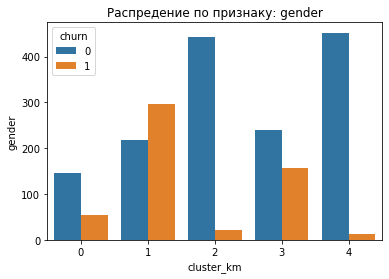

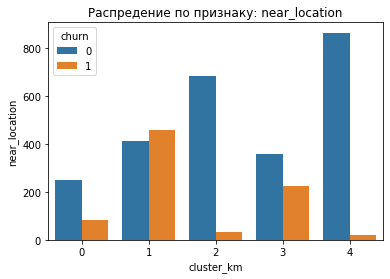

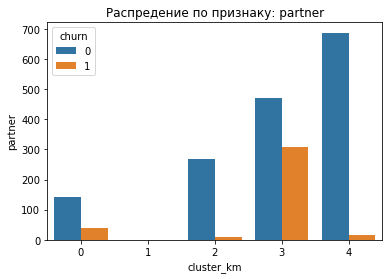

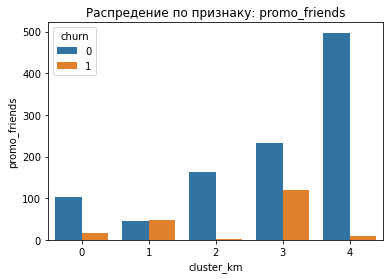

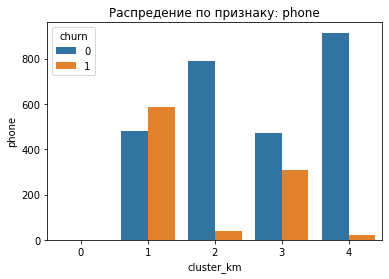

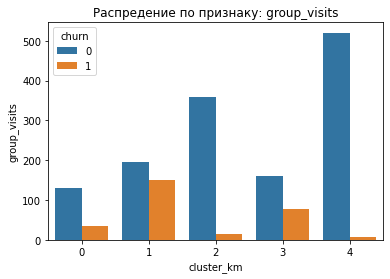

In [16]:
for col in gym_churn.drop(
    ['age', 
     'contract_period', 
     'avg_additional_charges_total', 
     'month_to_end_contract', 
     'lifetime', 
     'avg_class_frequency_total', 
     'avg_class_frequency_current_month'
    ], axis=1).columns:
    if col != 'churn' and col != 'cluster_km':
        df_grouped = gym_churn.groupby(['cluster_km', 'churn'])[col].sum().reset_index()
        sns.barplot(data=df_grouped, y=col, x='cluster_km', hue='churn');
        plt.title('Распредение по признаку: ' + col)
        plt.show()

Согласно распределению признака для кластеров можно сделать следующие выводы:
- меньше всего оттока по всем признакам наблюдается по первому и пятому кластеру;
- больше всего оттока наблюдается по четвертому кластеру, там по некоторым признакам 'gender', 'near_Location', 'phone' и  'avg_class_frequency_total' количество оттока превышает количество оставшихся пользователей.

Для дискретных переменных построим обычные столбчатые диаграммы.

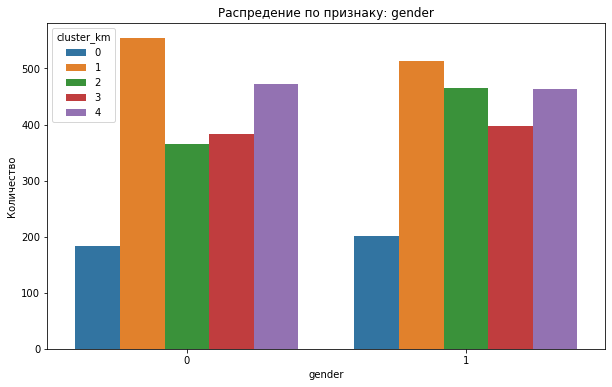

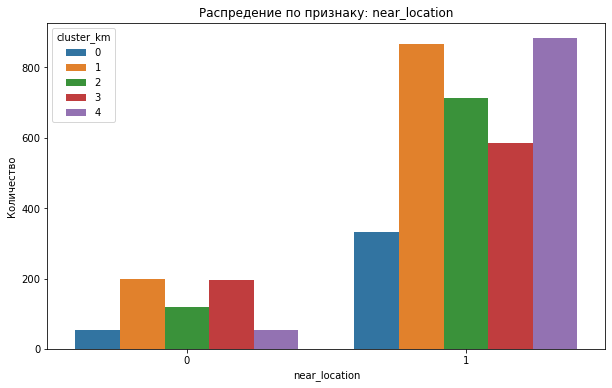

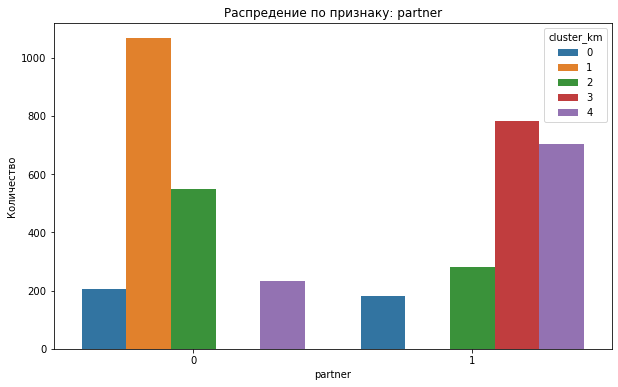

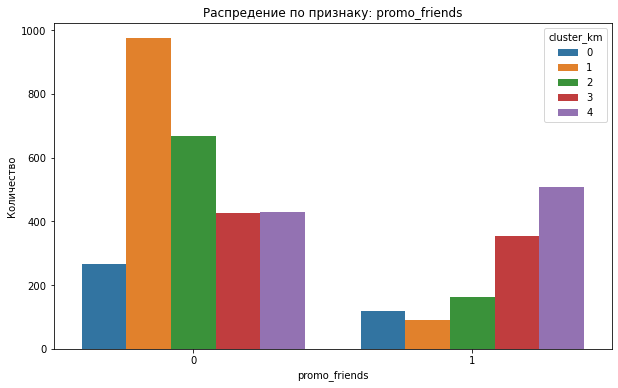

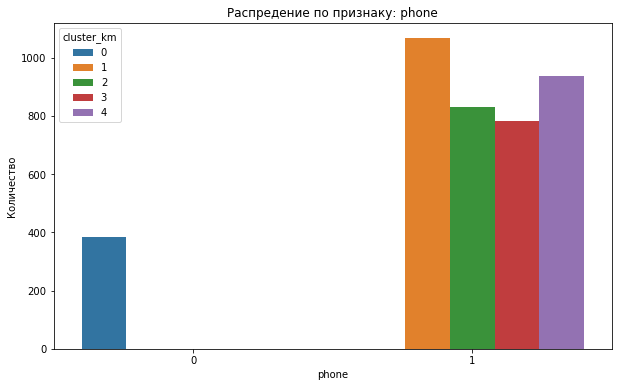

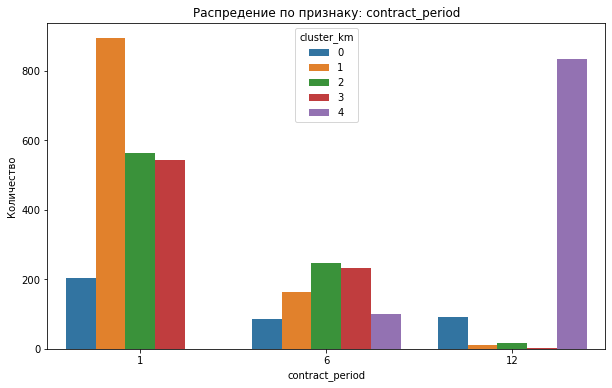

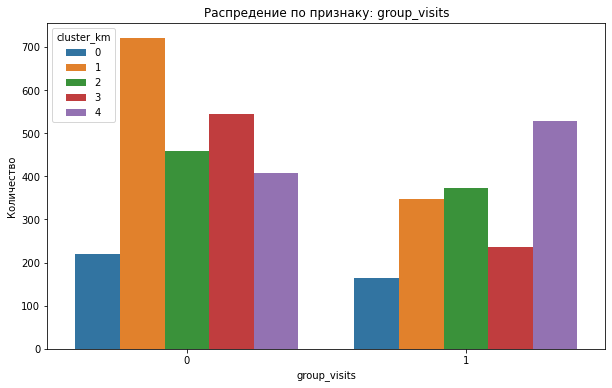

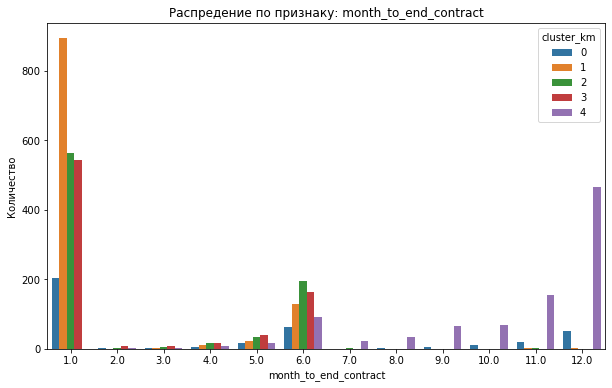

In [17]:
for col in gym_churn.drop(
    ['age', 
     'avg_additional_charges_total',  
     'lifetime', 
     'avg_class_frequency_total', 
     'avg_class_frequency_current_month'
    ], axis=1).columns:
    if col != 'churn' and col != 'cluster_km':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=gym_churn, x=col, hue='cluster_km');
        plt.title('Распредение по признаку: ' + col)
        plt.ylabel("Количество")
        plt.show()

Исходя из построенных графиков можно сделать вывод, что самые многочисленные кластеры это четвертый кластер и первый кластер. Большая часть людей в кластерах живут или работают рядом с фитнес-центром, практически по всем кластерам есть телефоны. 

Для непрерывных данных построим боксплоты.

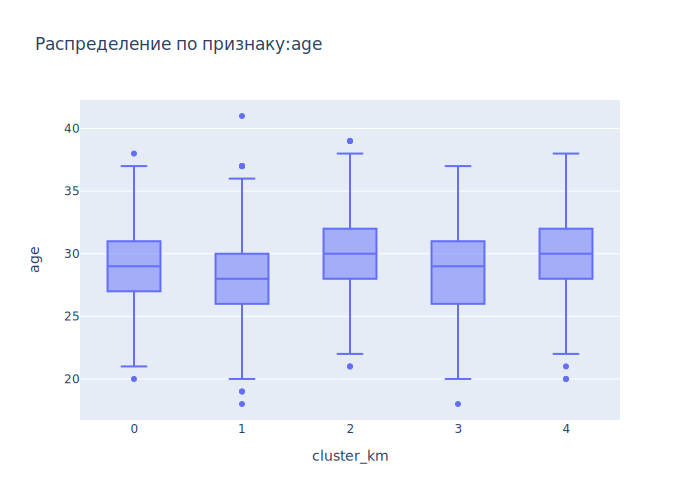

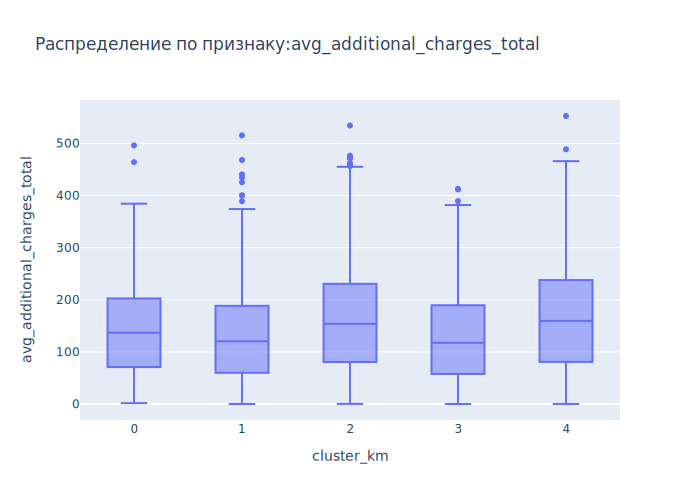

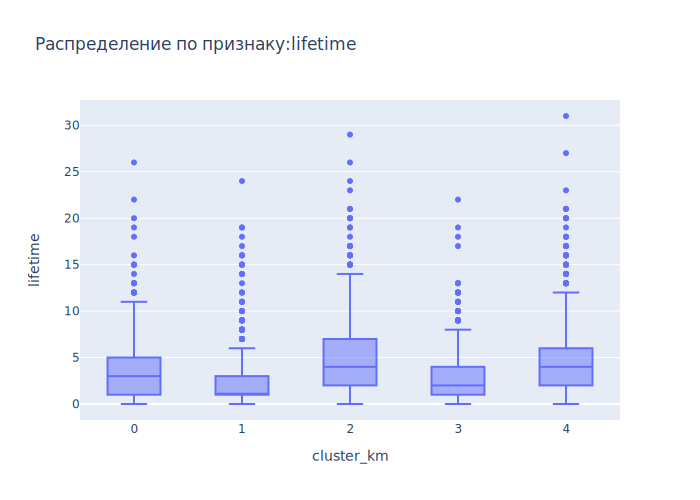

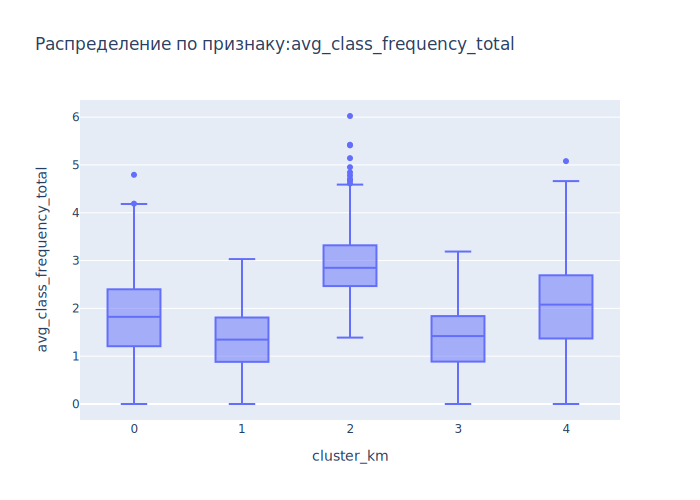

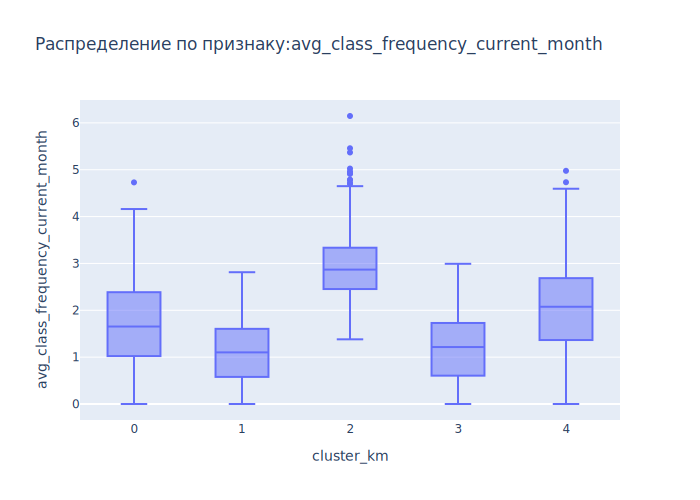

In [18]:
for col in gym_churn.drop(
    ['gender', 
     'near_location',
     'month_to_end_contract',
     'contract_period',
     'partner', 
     'promo_friends', 
     'phone', 
     'group_visits'
    ], axis=1).columns:
    if col != 'churn' and col != 'cluster_km':
        fig = px.box(gym_churn, y=col, x="cluster_km", title='Распределение по признаку:' + col)
        fig.show(renderer='svg');

На основе полученных боксплотов можно сделать выводы:
    - средний возраст по всем группам составляет от 28 до 30 лет;
    - средняя суммарная выручка от других услуг по коастерам вартируется от 119 до 156;
    - средняя посещаемость зала в неделю составляет от 1,2 до 2,7.

Для каждого полученного кластера посчитаем долю оттока (методом __groupby__)

In [19]:
df_mean_count = gym_churn.groupby('cluster_km')['churn'].sum()/gym_churn.groupby('cluster_km')['churn'].count()
print('Доля оттока по каждому кластеру')
print(' ')
for i, name in enumerate(df_mean_count):
    print('Доля оттока по кластеру  {} -  {:.1%}'.format(i+1, name))

Доля оттока по каждому кластеру
 
Доля оттока по кластеру  1 -  26.8%
Доля оттока по кластеру  2 -  55.0%
Доля оттока по кластеру  3 -  4.8%
Доля оттока по кластеру  4 -  39.6%
Доля оттока по кластеру  5 -  2.4%


In [20]:
df_mean_count1 = gym_churn.groupby('cluster_km')['churn'].sum()/gym_churn.groupby('cluster_km')['churn'].sum().sum()
print('Доля оттока по каждому кластеру в общем обьеме')
for i, name in enumerate(df_mean_count1):
    print('Доля оттока по кластеру  {} -  {:.1%}'.format(i+1, name))

Доля оттока по каждому кластеру в общем обьеме
Доля оттока по кластеру  1 -  9.7%
Доля оттока по кластеру  2 -  55.3%
Доля оттока по кластеру  3 -  3.8%
Доля оттока по кластеру  4 -  29.1%
Доля оттока по кластеру  5 -  2.1%


Больше всего оттока в общем объеме наблюдается по четвертому кластеру (61.2%). Самый малелький процент по оттоку у первого кластера - 2,8%.

__Вывод:__<br>
Нами было выделено пять кластеров с распределением по признакам.
Четвертый кластер занимает уверенно первое место по доле оттока - 51,4, а от общего оттока по всем кластерам 61,2%.
Данный кластер характеризуется следующими признаками:
- здесь самая маленькая длительность текущего действующего абонемента среди всех кластеров
- самая маленькая посещаемость групповых занятий
- здесь занимаются самые молодые клиенты
- здесь самая маленькая суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
- здесь наименьщее количество посетителей живущих рядом
- здесь наименьщее количество посещений в неделю и за прощлый месяц

Меньше всего оттока наблюдается по первому кластеру (2,8%), а от общего оттока по всем кластерам 2,6%. Данный кластер характеризуется следующими признаками:
- второй по количеству клиентов живущих рядом
- первый по величине показатель количества клиентов из компании партнера
- первый по величине показатель количества клиентов приходящих по промо коду друзей
- максимальная длительность текущего действующего абонемента
- максимальная величина посещаемости групповых занятий
- на втором месте по суммарной выручке от доп. услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон возрастные клиенты 2 место
- здесь второе по величине количество посещений в неделю и за прощлый месяц

## 5. Формулировка выводов с выработкой базовых рекомендаций по работе с клиентами <a name="conclusion"></a> 

Исходя из проведенного анализа можно сделать следующие выводы:
1. на основе матрицы корреляции, распределения признаков можно сказать, что на отток больше всего влияет следующие факторы: расположенность рядом с домом и работой, срок договора (чем меньше срок договора, тем больше отток), возраст пользователя (по более возрастной группе, начиная с 27 лет, наблюдается меньше отток), количество посещений на неделе занятий (по пользователям, которые наиболее часто посещают занятия наблюдается меньший отток), срок до окончания текущего действующего абонемента (в месяцах) (самый высокий отток в последние месяца до окончания) и посещение групповых затрат. 
2. построена модель прогнозирования оттока клиентов с помощью двух моделей - линейной регрессии и случайным лесом. Доля правильных ответов (accuracy) при двух выбранных нами моделях составляет 92%, а точность и полнота больше 80%.
3. проведенная кластеризация клиентов сформировала пять кластеров. Выделим признаки кластера, по которым наблюдается больше всего оттока по пользователям:<br>
-самая маленькая длительность текущего действующего абонемента среди всех кластеров<br>
-самая маленькая посещаемость групповых занятий<br>
-наиболее самые молодые клиенты<br>
-самая маленькая суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон<br>
-наименьшее количество посетителей живущих рядом<br>
-наименьшее количество посещений в неделю и за прошлый месяц<br>

На основе этого можно сделать следующие __рекомендации__:<br>
1) Отменить краткосрочные абонементы, а именно от одного месяца до трех месяцов, так как по ним наблюдается самый большой отток, люди должны быть заинтересованы в покупке долгосрочного договора.<br>
2) Активно работать с молодой аудиторией, необходимо разработать план по снижению оттока молодой аудитории, для этого необходимо проводить мероприятия для данной целевой группы. Как вариант, внедрение новых видов групповых занятий, как йога, капоэйра, спортивные танцы.<br>
3) Увеличить активность работы с клиентами, у которых заканчивается срок договора, необходимо за два месяца до окончания договора, обзванивать их и предлагать новый договор по выгодным ценам.<br>